# import modules

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# helper functions (if necessary)

In [37]:
# Code

# read in training data

In [38]:
train_data = pd.read_csv("train.csv")
print(train_data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

# visualize data

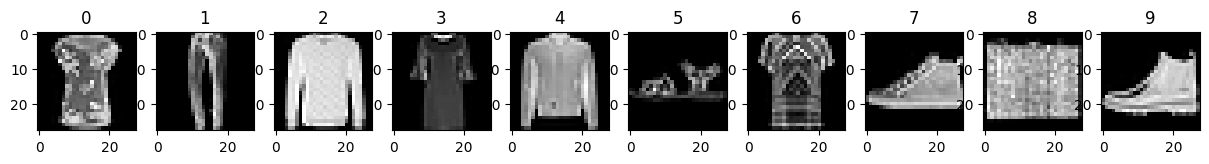

In [39]:
X_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int32')
X_train = X_train / 255.0

# Reshaping the input features to 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28)

# Visualizing a random image for each unique category (label)
fig, axs = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axs[i].imshow(X_train[y_train == i][np.random.randint(0, 5000), :, :], cmap='gray')
    axs[i].set_title(str(i))
plt.show()

# experiment with classifier parameters

In [40]:
X_train = X_train / 255.0
y_train_cat = keras.utils.to_categorical(y_train, 10)

# Building a deep neural network model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Question: What classifier model parameters work best?

answer goes here..

# train a "fresh" classification model

In [44]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=128)

# Evaluate model on training set
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8587
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8622
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8654
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8685
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8693
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8715
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8742
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8762
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8785
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8795

# read in test data

In [42]:
test_data = pd.read_csv("test.csv")
print(test_data)


      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel775  pixel776 

# predict test data labels with trained classifier

In [43]:
X_test = test_data.values.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test = X_test / 255.0

y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

313/313 [==============================] - 0s 895us/step


# write test data with predictions to \<YourLastName>.csv

In [45]:
submission_df = pd.DataFrame({'Label': y_test_pred})
submission_df.index += 1
submission_df.index.name = 'ImageId'
submission_df.to_csv('Rakowicz.csv')